#Качаем датасет

In [1]:
!wget -O pred_data.zip https://www.dropbox.com/s/94k5ip6147r61vr/pred_data.zip?dl=0

--2022-06-25 12:57:53--  https://www.dropbox.com/s/94k5ip6147r61vr/pred_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/94k5ip6147r61vr/pred_data.zip [following]
--2022-06-25 12:57:54--  https://www.dropbox.com/s/raw/94k5ip6147r61vr/pred_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1171c09997b39f5eedf18d549f.dl.dropboxusercontent.com/cd/0/inline/Bn5DJz_L48bLRDLPK-XYkuKbWZ6uW8pYazMLRJfwNKjt2qnB82oJzurMOUTLw1BpVJjDIi2qw_eh8YlnOjULWqehXpm7jeQhb70onhkjS-JIqPhbPL00y7FkO0_f1rmg6-XWe7g1sasbSBsQZ__rQPc29g8W2WqEj_U4W7tA1eNF9g/file# [following]
--2022-06-25 12:57:54--  https://uc1171c09997b39f5eedf18d549f.dl.dropboxusercontent.com/cd/0/inline/Bn5DJz_L48bLRDLPK-XYkuKbWZ6uW8pYazMLRJfwNKjt2qnB82oJzurMOUTL

In [2]:
!unzip pred_data.zip

Archive:  pred_data.zip
  inflating: test.csv                
  inflating: train.csv               
   creating: img/
  inflating: img/106A2785_s.jpg.jpg  
  inflating: img/106A2793_s.jpg.jpg  
  inflating: img/106A2797_s.jpg.jpg  
  inflating: img/106A2816_s.jpg.jpg  
  inflating: img/106A2833_s.jpg.jpg  
  inflating: img/106A2883_s.jpg.jpg  
  inflating: img/106A2890_s.jpg.jpg  
  inflating: img/106A2898_s.jpg.jpg  
  inflating: img/106A2918_s.jpg.jpg  
  inflating: img/106A2996_s.jpg.jpg  
  inflating: img/106A3016_s.jpg.jpg  
  inflating: img/106A3169_s.jpg.jpg  
  inflating: img/106A3172_s.jpg.jpg  
  inflating: img/106A3177_s.jpg.jpg  
  inflating: img/106A3183_s.jpg.jpg  
  inflating: img/106A3195_s.jpg.jpg  
  inflating: img/106A3198_s.jpg.jpg  
  inflating: img/106A3200_s.jpg.jpg  
  inflating: img/106A3206_s.jpg.jpg  
  inflating: img/106A3268_s.jpg.jpg  
  inflating: img/13A_6668.jpg.jpg    
  inflating: img/13A_6670.jpg.jpg    
  inflating: img/13A_6671.jpg.jpg    
  inflat

#Библиотеки

In [3]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Normalization
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomCrop, CenterCrop, RandomZoom, RandomContrast
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 
from PIL import Image

#Обрабокта данных

In [4]:
w = 256
h = 256

In [5]:
def pred(img):
    i = Image.open(img)
    i = i.resize((w, h), Image.ANTIALIAS)
    return np.array(i)/255

In [6]:
train = pd.read_csv('train.csv')

,Названия,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,img/A_Oshepkov-3191.jpg.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,img/IMG_2427.jpg.jpg,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,img/DSCN8095.JPG.jpg,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,img/DSC_0106.jpg.jpg,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,img/photo_2022-02-15 20.51.13.jpeg.jpg,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,img/A_Oshepkov-3600.jpg.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
950,img/A_Oshepkov-2866.jpg.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
951,img/DJI_0765.JPG.jpg,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
952,img/DSC08234.jpg.jpg,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
x_train = train["Названия"].apply(pred)
x_train = np.array([np.array(val,dtype=np.float32) for val in x_train])

In [8]:
y_train = train.iloc[:,1:]

,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
950,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
951,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
952,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


#Расширение данных

In [75]:
data_augmentation = Sequential()
data_augmentation.add(RandomFlip("vertical", input_shape=(w,h,3)))
data_augmentation.add(RandomRotation(0.2))
data_augmentation.add(RandomZoom(0.3))
data_augmentation.add(RandomCrop(128, 128))

#Предобученная сеть

In [76]:
count_klass = y_train.shape[1]

In [77]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(256, 256, 3))

In [78]:
vgg16_net.trainable = False

In [79]:
model = Sequential()
# model.add(Normalization(input_shape=(w,h,3)))
# model.add(data_augmentation)

# Добавляем модель VGG16 в сеть как слой
model.add(vgg16_net)

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(count_klass, activation='sigmoid'))

**Компилируем модель**

In [80]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['binary_accuracy'])

In [81]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dense_24 (Dense)            (None, 4096)              134221824 
                                                                 
 dense_25 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_26 (Dense)            (None, 17)                69649     
                                                                 
Total params: 165,787,473
Trainable params: 151,072,785
Non-trainable params: 14,714,688
_________________________________________________________________


#Обратный вызов

In [82]:
ch_p=ModelCheckpoint('best_model.h5', 
                    monitor='val_binary_accuracy', 
                    verbose=1, 
                    save_best_only=True,
                    )

In [83]:
e_s=EarlyStopping(monitor='val_binary_accuracy', 
                      patience=10, 
                      verbose=1
                      )


#Обучаем нейронную сеть

In [84]:
model.fit(x_train, y_train,
          validation_split=0.2, 
          epochs=100, 
          batch_size=10,
          callbacks=[ch_p,e_s],
          verbose=1)

Epoch 1/100
77/77 [==============================] - ETA: 0s - loss: 0.6390 - binary_accuracy: 0.8645
Epoch 1: val_binary_accuracy improved from -inf to 0.90514, saving model to best_model.h5
77/77 [==============================] - 21s 250ms/step - loss: 0.6390 - binary_accuracy: 0.8645 - val_loss: 0.2391 - val_binary_accuracy: 0.9051
Epoch 2/100
77/77 [==============================] - ETA: 0s - loss: 0.1831 - binary_accuracy: 0.9303
Epoch 2: val_binary_accuracy improved from 0.90514 to 0.91869, saving model to best_model.h5
77/77 [==============================] - 17s 226ms/step - loss: 0.1831 - binary_accuracy: 0.9303 - val_loss: 0.2333 - val_binary_accuracy: 0.9187
Epoch 3/100
77/77 [==============================] - ETA: 0s - loss: 0.1046 - binary_accuracy: 0.9596
Epoch 3: val_binary_accuracy did not improve from 0.91869
77/77 [==============================] - 10s 124ms/step - loss: 0.1046 - binary_accuracy: 0.9596 - val_loss: 0.2910 - val_binary_accuracy: 0.9132
Epoch 4/100
77/

#Оцениваем качество обучения

In [85]:
model.load_weights("best_model.h5")

In [86]:
test = pd.read_csv('test.csv')
x_test = test["Названия"].apply(pred)
x_test = np.array([np.array(val,dtype=np.float32) for val in x_test])
y_test = test.iloc[:,1:]

In [87]:
predictions = model.predict(x_test)

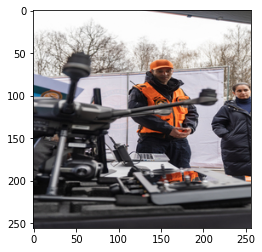

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Авиа             0
Автомобили       0
БПЛА             0
Водолаз          0
Кинолог          0
Кони             0
Объятия          0
Шерп             0
День             1
Ночь             0
Рассвет/закат    0
Зима             0
Весна            1
Лето             0
Осень            0
Лес              0
Город            0
Name: 10, dtype: int64


In [88]:
n = 10
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()
arr =[]
for i in predictions[n]:
    if i >= 0.5:
      arr.append(1)
    else:
      arr.append(0)
print(arr)
print(y_test.iloc[n])

In [89]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 2s 192ms/step - loss: 0.3507 - binary_accuracy: 0.9301


[0.3507270812988281, 0.9300544857978821]

#Тонкая настройка

In [90]:
vgg16_net.trainable = True

In [91]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [97]:
history = model.fit(x_train, y_train,
          validation_split=0.2, 
          epochs=10, 
          batch_size=10,
          callbacks=[ch_p,e_s],
          verbose=1)

Epoch 1/10
77/77 [==============================] - ETA: 0s - loss: 0.0025 - binary_accuracy: 0.9985
Epoch 1: val_binary_accuracy did not improve from 0.94364
77/77 [==============================] - 20s 255ms/step - loss: 0.0025 - binary_accuracy: 0.9985 - val_loss: 0.3210 - val_binary_accuracy: 0.9403
Epoch 2/10
77/77 [==============================] - ETA: 0s - loss: 0.0024 - binary_accuracy: 0.9987
Epoch 2: val_binary_accuracy improved from 0.94364 to 0.94518, saving model to best_model.h5
77/77 [==============================] - 29s 376ms/step - loss: 0.0024 - binary_accuracy: 0.9987 - val_loss: 0.2998 - val_binary_accuracy: 0.9452
Epoch 3/10
77/77 [==============================] - ETA: 0s - loss: 0.0021 - binary_accuracy: 0.9987
Epoch 3: val_binary_accuracy improved from 0.94518 to 0.94549, saving model to best_model.h5
77/77 [==============================] - 29s 372ms/step - loss: 0.0021 - binary_accuracy: 0.9987 - val_loss: 0.3008 - val_binary_accuracy: 0.9455
Epoch 4/10
77/7

#Оцениваем качество обучения после тонкой настройки

In [98]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 2s 184ms/step - loss: 0.3157 - binary_accuracy: 0.9481


[0.31568050384521484, 0.9480968713760376]

#Сохранение

In [99]:
model.save("LAModel_9481.h5")

In [101]:
!mv "LAModel_9481.h5" "drive/MyDrive"